# Apartemnts sales research

We have data from one of the Real Estate services, which represented by ads of apartments in the city of St. Petersburg and neighboring areas for a period of several years. We need to learn how to determine the market value of real estate. Our assignment is to set necessary parameters. This will allow us to build an automated system, such as tracking for anomalies and any fraudulent activity.

Every apartment ads has two types of data. Firts one the data entered by user himself, the second one parameters obtained automatically based on geopositioning data. For example, distance to the center of the city, distance to the airport, distance to the nearest park and any nearest ponds.

### Let's open the data file and examine the general information.

In [1]:
# import the libraries necessary for work and see the first 10 rows of our dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# remove the output of numbers using scientific notation
pd.options.display.float_format = '{:.2f}'.format

try:
    df_raw = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    df_raw = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

# create a copy of the original data that we will use for further manipulations 
df = df_raw.copy()

df.head(10)

pd.options.mode.chained_assignment = None 

#### We get general information about the data of the df table by applying the info() method to it:

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### There is no style violation in the column names, except for the `cityCenters_nearest` column. Let's convert this column to lower case:

In [3]:
df.columns = df.columns.str.lower()

#### Let's apply the describe() method to the df table and display a list of characteristic values.

In [4]:
# for readability, use the T function to transpose the index and columns of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.00,9.86,5.68,0.00,6.00,9.00,14.00,50.00
last_price,23699.00,6541548.77,10887013.27,12190.00,3400000.00,4650000.00,6800000.00,763000000.00
total_area,23699.00,60.35,35.65,12.00,40.00,52.00,69.90,900.00
rooms,23699.00,2.07,1.08,0.00,1.00,2.00,3.00,19.00
ceiling_height,14504.00,2.77,1.26,1.00,2.52,2.65,2.80,100.00
floors_total,23613.00,10.67,6.60,1.00,5.00,9.00,16.00,60.00
living_area,21796.00,34.46,22.03,2.00,18.60,30.00,42.30,409.70
floor,23699.00,5.89,4.89,1.00,2.00,4.00,8.00,33.00
kitchen_area,21421.00,10.57,5.91,1.30,7.00,9.10,12.00,112.00
balcony,12180.00,1.15,1.07,0.00,0.00,1.00,2.00,5.00


The original table contains 22 columns, with a description of the data on the sold apartments and their parameters:

- `airports_nearest` — distance to the nearest airport in meters (m)
- `balcony` — number of balconies
- `ceiling_height` - ceiling height (m)
- `citycenters_nearest` - distance to the city center (m)
- `days_exposition` - how many days the ad was active (from initial publication to removal)
- `first_day_exposition` — publication date
- `floor` - floor
- `floors_total` - total floors in the building
- `is_apartment` — apartments (boolean type)
- `kitchen_area` - kitchen area in square meters (m²)
- `last_price` - price at the time of removal from publication
- `living_area` - living area in square meters (m²)
- `locality_name` - the name of the locality
- `open_plan` - free layout (boolean type)
- `parks_around3000` - number of parks within 3 km radius
- `parks_nearest` — distance to the nearest park (m)
- `ponds_around3000` - number of ponds within a radius of 3 km
- `ponds_nearest` - distance to the nearest body of water (m)
- `rooms` - number of rooms
- `studio` — studio apartment (boolean type)
- `total_area` - total area of the apartment in square meters (m²)
- `total_images` - the number of photos of the apartment in the ad

#### Let's build a  histogram for all numeric columns of the table using the hist() method.

The histogram will combine numerical values by ranges and show how often this or that value occurs in our data set.

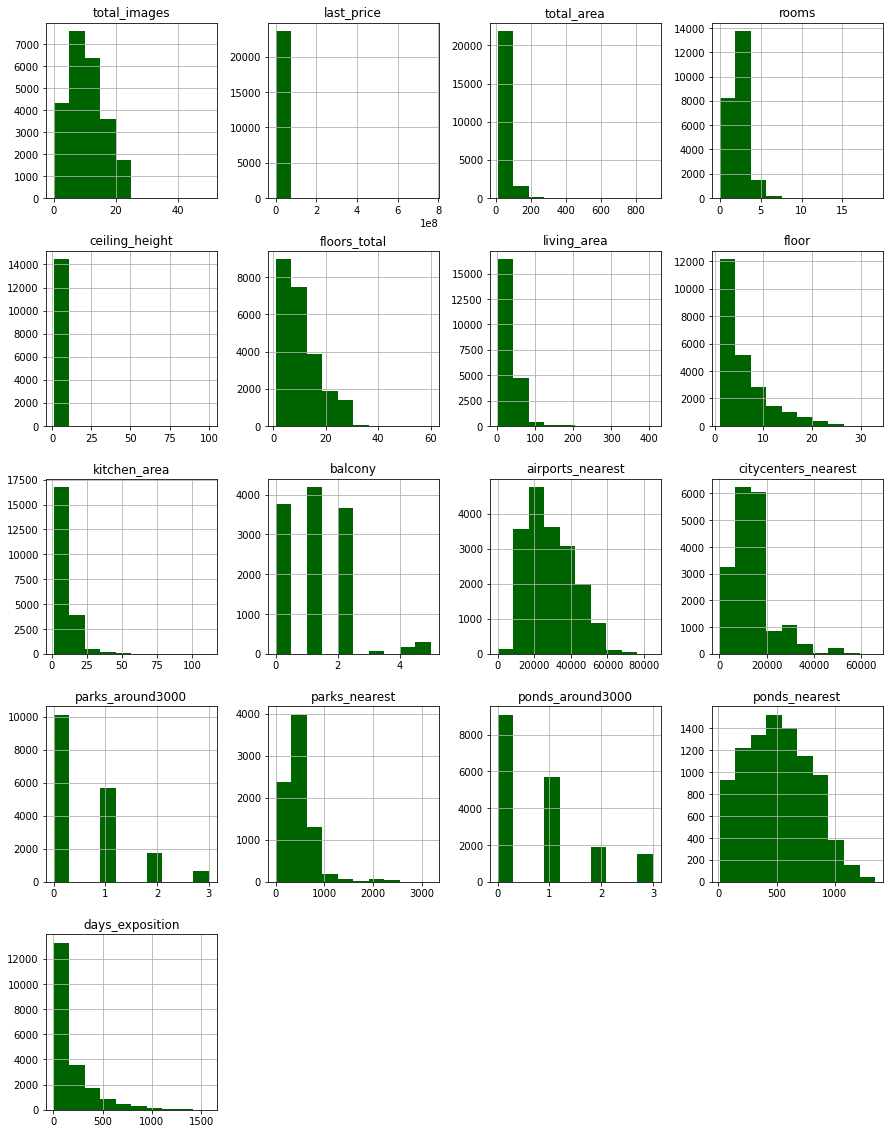

In [5]:
df.hist(figsize=(15, 20), color='DarkGreen')
pass

**Conclusion:**
Having studied the general information of the dataset, we can notice that some values have the wrong data type. For example, the `first_day_exposition` column is not the `datetime` date type we need for later extraction of the day and month, and the number of balconies `balcony` is not an integer value. Also `is_apartment` - apartments has an object type, and based on the initial description of our dataset, it must take boolean values.
With the help of the `isna()` method, we see that our dataset has a large number of gaps in the data in 14 columns. This can have a negative impact on data analysis and visualization. Below we will start processing them.
By applying the `describe()` method to the original data table, we can also observe outliers in some data categories. So, in the `rooms` column there are values with the number of rooms equal to 19, and `balcony` has 5 balconies. Paying attention to the publication price, one can also notice strongly deviating values with the price of objects at 763 million rubles. All of these outliers can affect our analysis of the data, so appropriate pre-processing is required.

### Data preprocessing

#### Let's Find and examine the missing values in the columns by sorting the values in descending order:


In [6]:
df.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
citycenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

#### Let's visualize the percentage of missing values in the columns of our dataset:

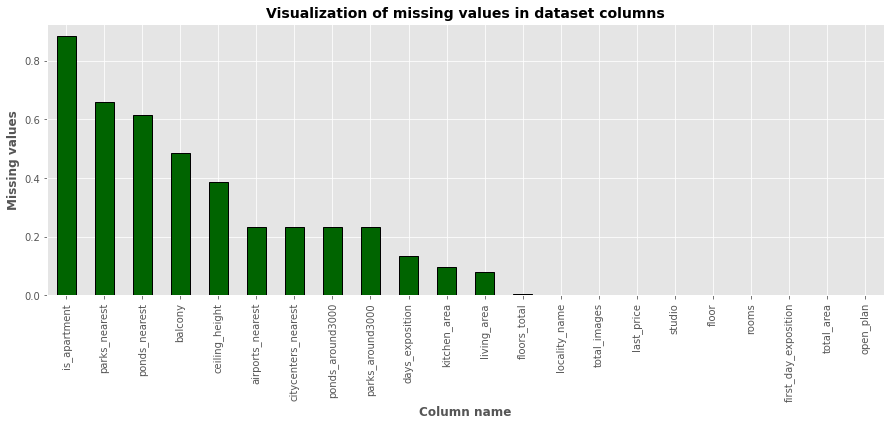

In [7]:
# use a visually friendly style and adjust the grid, color and font size settings
plt.style.use('ggplot')

# mean of missing values sorted in descending order
df.isna().mean().sort_values(ascending=False).plot(
    kind='bar', figsize=(15,5), 
    grid=True, color='DarkGreen', 
    edgecolor='black', linewidth=1,
)
plt.title('Visualization of missing values in dataset columns',fontsize=14, fontweight="bold")
plt.xlabel('Column name',fontweight="bold")
plt.ylabel('Missing values', fontweight="bold")
plt.show()

#### Column `is_apartment`

In [8]:
# count the number of passes
print('Number of missing values in column "is_apartment":', df['is_apartment'].isna().sum())
df['is_apartment'].value_counts()

Number of missing values in column "is_apartment": 20924


False    2725
True       50
Name: is_apartment, dtype: int64

The `is_apartment` column is not used in our data analysis, so we will replace the gaps with False values. Omissions could appear due to intentional incorrect data entry on the types of living space. For example, apartments cannot be permanently registered and tax deductible, they are characterized by high property taxes, utility and operating costs. When buying apartments, you will not be able to use maternity discount. 

#### Columns `parks_nearest`, `ponds_nearest`, `parks_around3000`, `ponds_around3000`, `airports_nearest`

In [9]:
print('Percentage of missing values in column "parks_nearest": {:.2%}'.format(df['parks_nearest'].isna().mean()))
print('Percentage of missing values in column "ponds_nearest": {:.2%}'.format(df['ponds_nearest'].isna().mean()))
print('Percentage of missing values in column "parks_around3000": {:.2%}'.format(df['parks_around3000'].isna().mean()))
print('Percentage of missing values in column "ponds_around3000": {:.2%}'.format(df['ponds_around3000'].isna().mean()))
print('Percentage of missing values in column "airports_nearest": {:.2%}'.format(df['airports_nearest'].isna().mean()))

Percentage of missing values in column "parks_nearest": 65.91%
Percentage of missing values in column "ponds_nearest": 61.56%
Percentage of missing values in column "parks_around3000": 23.28%
Percentage of missing values in column "ponds_around3000": 23.28%
Percentage of missing values in column "airports_nearest": 23.38%


Data from the specified columns is not used in our analysis. We do not have to determine the relationship between the price of an object and the speed of sale from these characteristics, so there is no need to replace the missing values. If necessary, missing values could be restored using the location of the object on the map. Presumably, this data was filled in automatically by the system, which may be due to a large number of gaps. The human factor is also not ruled out.

#### Column `balcony`

In [10]:
print('Percentage of missing values in column "balcony": {:.2%}'.format(df['balcony'].isna().mean()))
df['balcony'].value_counts()

Percentage of missing values in column "balcony": 48.61%


1.00    4195
0.00    3758
2.00    3659
5.00     304
4.00     183
3.00      81
Name: balcony, dtype: int64

It can be assumed that if there is no data on a balcony entry, then the answer about the presence of a balcony was not given. Accordingly, in this case, we can replace missing values with 0 . Balcony is an important feature in the sale of real estate, so the absence of this value in the data most likely indicates the physical absence of a balcony at the property.

#### Column `ceiling_height`

In [11]:
print('Percentage of missing values in column "ceiling_height": {:.2%}'.format(df['ceiling_height'].isna().mean()))

Percentage of missing values in column "ceiling_height": 38.80%


This column is necessary for us in our  analysis. Above, using the describe() method, we found out that this column has outliers - ceilings 1.00 meters high and 100 meters high. Let's find the mean and median value of the column.

In [12]:
print(df['ceiling_height'].mean())
print(df['ceiling_height'].median())

2.77149889685604
2.65


Next, we will replace the gaps in the ceiling height data with the median value, since it corresponds to the minimum ceiling heights prescribed in SP 54.13330.2016 “SNiP 31-01-2003 Residential multi-apartment buildings”. We will assume that the gaps appeared by chance.

#### Column `days_exposition`

In [13]:
print('Percentage of missing values in column "days_exposition": {:.2%}'.format(df['days_exposition'].isna().mean()))

Percentage of missing values in column "days_exposition": 13.42%


The number of days the ad was active (from posting to removal) is necessary for us to perform the analysis. We will not be able to recover the data in the missing values in any way. Missing data in a column may indicate that the property is in the process of being sold and therefore the listing has not been removed. The percentage of missing values is quite significant (13%), so we leave the missing values as they are in order to avoid distortions in the analysis process.

#### Columns `kitchen_area`, `living_area`

In [14]:
print('Percentage of missing values in column "kitchen_area": {:.2%}'.format(df['kitchen_area'].isna().mean()))
print('Percentage of missing values in column "living_area": {:.2%}'.format(df['living_area'].isna().mean()))

Percentage of missing values in column "kitchen_area": 9.61%
Percentage of missing values in column "living_area": 8.03%


The values in these columns are necessary for us to carry out the analysis and subsequent conclusions. Therefore, let's try to replace the missing values as follows:

- Let's replace the missing values of the residential area of the property as the ratio of the average value of the living area of this object to the average of the total area, then multiplying the found ratio by the total area of a particular object.

- Replace the missing values of the kitchen area with the ratio of the average value of the kitchen area to the average of the total area, then multiplying the found ratio by the total area of a particular object.

#### Column `floor_total`

In [15]:
print('Percentage of missing values in column "floors_total": {:.2%}'.format(df['floors_total'].isna().mean()))

Percentage of missing values in column "floors_total": 0.36%


The Percentage of missing values in this column is insignificant, thus there will be no significant distortion in the analysis of the data. Therefore, gaps in this column can be removed.

#### Column `citycenters_nearest`

In [16]:
print('Percentage of missing values in column "citycenters_nearest": {:.2%}'.format(df['citycenters_nearest'].isna().mean()))

Percentage of missing values in column "citycenters_nearest": 23.29%


The data of this column is important for our analysis. Data missing for unknown reasons. Could restore by geolocation, but there is no data in the set. If necessary, it would be possible to restore the missing values using the location of the object on the map. Presumably, this data was filled in automatically by the system, which may be due to a large number of gaps. The human factor is also not ruled out. Let's replace the missing values in this column with 0, excluding zero values from the analysis in the future.

#### Column `locality_name`

In [17]:
print('Percentage of missing values in column "locality_name": {:.2%}'.format(df['locality_name'].isna().mean()))

Percentage of missing values in column "locality_name": 0.21%


This column is not used for our analysis. The Percentage of gaps in this column is insignificant. Let's replace the missing values with the name of the locality to "unknown".

#### Processing of missing values

Based on the analysis of missing values performed in paragraphs 2.1-2.11, we will carry out the necessary replacement of missing values overwriting our dataset.

In [18]:
# remove gaps in the column with the number of floors
df.dropna(subset=['floors_total'], inplace=True)


# find the median height of the ceilings
ceiling_height_median = df['ceiling_height'].median()

# replace missing living area and kitchen area
living_ratio = df['living_area'].mean() / df['total_area'].mean()
kitchen_ratio = df['kitchen_area'].mean() / df['total_area'].mean()

df['living_area'].fillna(living_ratio * df['total_area'], inplace=True)
df['kitchen_area'].fillna(kitchen_ratio * df['total_area'], inplace=True)

# fill in the missing values for the columns of interest to us using a dictionary
values = {'is_apartment' : False, 'ceiling_height': ceiling_height_median,
           'balcony': 0, 'locality_name': 'unknown', 'citycenters_nearest': 0}
df.fillna(value=values, inplace=True)

df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23613 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23613 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          23613 non-null  bool   
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          23613 non-null  float64
 13  balcony               23613 non-null  float64
 14  locality_name         23613 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,False,...,25.00,0.00,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,2.65,11.00,18.60,1,False,...,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,2.65,5.00,34.30,4,False,...,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,2.65,14.00,90.81,9,False,...,27.84,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,False,...,41.00,0.00,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,2.65,12.00,14.40,5,False,...,9.10,0.00,городской посёлок Янино-1,NaN,0.00,NaN,NaN,NaN,NaN,55.00
6,6,3700000.00,37.30,2017-11-02T00:00:00,1,2.65,26.00,10.60,6,False,...,14.40,1.00,посёлок Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155.00
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,2.65,24.00,40.89,22,False,...,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN
8,20,2900000.00,33.16,2018-05-23T00:00:00,1,2.65,27.00,15.43,26,False,...,8.81,0.00,посёлок Мурино,NaN,0.00,NaN,NaN,NaN,NaN,189.00
9,18,5400000.00,61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,False,...,6.50,2.00,Санкт-Петербург,50898.00,15008.00,0.00,NaN,0.00,NaN,289.00


#### Replacing values

Let's examine the columns in which we need to change the data type and convert the data type in the selected columns as follows:
    
- `last_price` - convert to an integer value `int`, to exclude cents in the price.
- `total_area` - round to 1 decimal place, leaving the data type `float`. 
- `first_day_exposition` - replace `object` data type with `datetime`. To work with time, it is necessary to convert the data to the `datetime` format - this will allow us to receive the parameters of interest to us in the future.
- `rooms` - convert to integer value `int`. The number of rooms must take integer values
- `floors_total` - replace `object` with `int`. The floor must take integer values.
- `living_area` - round to 1 decimal place, and cast to `float`. 
- `floor` - cast to integer value `int`. Floor takes integer values.
- `kitchen_area` - round to 1 decimal place, and cast to `float`. 
- `balcony` - replace `object` with `int`. The number of balconies will always be an integer.
- `citycenters_nearest` - convert to integer value `int`. Distance in meters.
- `days_exposition` - replace `object` with `int`. Since this is the number of days, an integer.







In [19]:
df['last_price'] = df['last_price'].astype('int64')
df['living_area'] = df['living_area'].astype('float64').round(2)
df['total_area'] = df['living_area'].astype('float64').round(2)
df['kitchen_area'] = df['living_area'].astype('float64').round(2)
df['days_exposition'] = np.floor(pd.to_numeric(df['days_exposition'], errors='coerce')).astype(pd.Int64Dtype())
#df[col] = pd.to_numeric(df[col],errors='coerce').astype(pd.Int64Dtype())
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['rooms'] = df['rooms'].astype('int8')
df['floors_total'] = df['floors_total'].astype('int8')
df['balcony'] = df['balcony'].astype('int8')
df['citycenters_nearest'] = df['citycenters_nearest'].astype('int64')
df['floor'] = df['floor'].astype('int8')


df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  int64         
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int8          
 5   ceiling_height        23613 non-null  float64       
 6   floors_total          23613 non-null  int8          
 7   living_area           23613 non-null  float64       
 8   floor                 23613 non-null  int8          
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          23613 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,51.00,2019-03-07,3,2.70,16,51.00,8,False,...,51.00,0,Санкт-Петербург,18863.00,16028,1.00,482.00,2.00,755.00,<NA>
1,7,3350000,18.60,2018-12-04,1,2.65,11,18.60,1,False,...,18.60,2,посёлок Шушары,12817.00,18603,0.00,NaN,0.00,NaN,81
2,10,5196000,34.30,2015-08-20,2,2.65,5,34.30,4,False,...,34.30,0,Санкт-Петербург,21741.00,13933,1.00,90.00,2.00,574.00,558
3,0,64900000,90.81,2015-07-24,3,2.65,14,90.81,9,False,...,90.81,0,Санкт-Петербург,28098.00,6800,2.00,84.00,3.00,234.00,424
4,2,10000000,32.00,2018-06-19,2,3.03,14,32.00,13,False,...,32.00,0,Санкт-Петербург,31856.00,8098,2.00,112.00,1.00,48.00,121


Conclusion: Thus, we have selected the necessary columns for analysis and brought the data to the desired type. Further analysis will be carried out using scatterplots and slices, excluding anomalous values.

In [20]:
df.shape

(23613, 22)

#### List the unique values of the 'locality_name' column and eliminate implicit duplicates.

In [21]:
# for the convenience of visualization, we display the result as a list
sorted(df['locality_name'].unique().tolist())

['unknown',
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское

In [22]:
# get the length of the list by the names of settlements
len(df['locality_name'].unique())

365

We see a list consisting of 331 values. When analyzing the names, one can notice that “Ryabovo settlement” and “Ryabovo urban-type settlement”, “Telman settlement” and “Telman settlement” are designations of the same settlements. We can replace the names in an existing column, thereby eliminating implicit duplicates. Let's apply the following logic:

In [23]:
# using regular expressions, replace the following lines
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex=True)
df['locality_name'] = df['locality_name'].str.replace('поселок городского типа ', 
'', regex=True).replace('городской поселок ', '', regex=True).replace('поселок при железнодорожной станции ', 
'', regex=True).replace('поселок станции ', '', regex=True).replace('коттеджный поселок ', 
'', regex=True).replace('деревня ', '', regex=True).replace('поселок ', 
'', regex=True).replace('село ', '', regex=True).replace('садоводческое некоммерческое товарищество ', 
'', regex=True).replace('садовое товарищество ', '', regex=True)

In [24]:
# the length of the list of unique names of settlements has been reduced
len(df['locality_name'].unique())

306

In [25]:
# display the sorted list again for verification
sorted(df['locality_name'].unique().tolist())

['unknown',
 'Агалатово',
 'Александровская',
 'Алексеевка',
 'Аннино',
 'Аро',
 'Барышево',
 'Батово',
 'Бегуницы',
 'Белогорка',
 'Белоостров',
 'Бокситогорск',
 'Большая Вруда',
 'Большая Ижора',
 'Большая Пустомержа',
 'Большие Колпаны',
 'Большое Рейзино',
 'Большой Сабск',
 'Бор',
 'Борисова Грива',
 'Бугры',
 'Будогощь',
 'Ваганово',
 'Важины',
 'Вартемяги',
 'Вахнова Кара',
 'Вещево',
 'Виллози',
 'Вознесенье',
 'Возрождение',
 'Войсковицы',
 'Войскорово',
 'Володарское',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Вырица',
 'Выскатка',
 'Высокоключевой',
 'Высоцк',
 'Гаврилово',
 'Гарболово',
 'Гатчина',
 'Гладкое',
 'Глажево',
 'Глебычево',
 'Глинка',
 'Гончарово',
 'Горбунки',
 'Гостилицы',
 'Громово',
 'Дзержинского',
 'Дружная Горка',
 'Дружноселье',
 'Дубровка',
 'Елизаветино',
 'Ефимовский',
 'Жилгородок',
 'Жилпоселок',
 'Житково',
 'Заводской',
 'Заклинье',
 'Заневка',
 'Запорожское',
 'Зеленогорск',
 'Зимитицы',
 'Ивангород',
 'Извара',
 'Ильичево',
 'Иссад',


Thus, we managed to remove 142 implicit duplicates from the `locality_name` column.

#### Let's find and eliminate rare and outlier values (anomalies) in the columns that will be needed for analysis.

- The `last_price` column will be analyzed for the presence of artefacts and outliers. We will remove apartments with too high  price, as well as apartments with a price below 300,000 rubles, using the `drop` method. There are no apartments with zero cost in our sample.

In [26]:
# make a selection using the query method with the necessary condition and print the result on the screen
print('Apartments worth 0 rub:', df.query('last_price == 0')['last_price'].count())
print('Apartments worth less than 200.000 rubles:', df.query('last_price < 200000')['last_price'].count())
print('Apartments worth more than 200.000 rubles:', df.query('last_price > 200000')['last_price'].count())
print('Apartments worth more than 100.000.000 rubles:', df.query('last_price > 100000000')['last_price'].count())

Apartments worth 0 rub: 0
Apartments worth less than 200.000 rubles: 1
Apartments worth more than 200.000 rubles: 23612
Apartments worth more than 100.000.000 rubles: 37


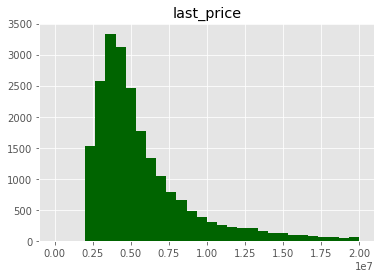

In [27]:
#remove outliers
df.drop(index=df.query('last_price > 100000000').index, inplace=True)
df.drop(index=df.query('last_price < 2000000').index, inplace=True)

# to visualize the distribution of values after processing, we will build a histogram
df.hist('last_price', bins=30, range=(0, 20000000), color='DarkGreen');

- The `total_area` column does not contain apartments with a total area of less than 10 sq.m.; despite this, there are values with a total area of less than 20 sq.m. These values will not be considered as anomalies. Real estate objects with a total area of more than 500 sq.m. can be considered outliers. There are few of them and therefore it is better to remove them.

In [28]:
# make a selection using the query method with the necessary condition and print the result on the screen
print('Apartment less than 20 sqm:',df.query('total_area < 20')['total_area'].count())
print('Apartments with an area of more than 500 sq.m.:',df.query('total_area > 500')['total_area'].count())

Apartment less than 20 sqm: 5900
Apartments with an area of more than 500 sq.m.: 0


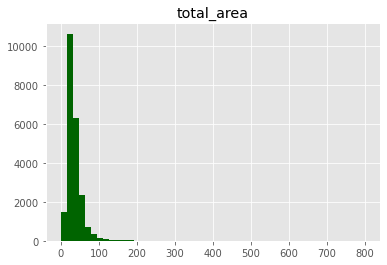

In [29]:
#remove abnormal values
df.drop(index=df.query('total_area > 500').index,inplace=True)

# to visualize the distribution of values after processing, we will build a histogram
df.hist('total_area', bins=50, range=(0,800), color='DarkGreen');

- The `rooms` column contains properties with 10+ rooms. There are few such values, they can be recognized as outliers, so it is better to remove them.

In [30]:
# make a selection using the query method with the necessary condition and print the result on the screen
print('Apartments with 7 or more rooms:',df.query('rooms > 7')['rooms'].count())

Apartments with 7 or more rooms: 28


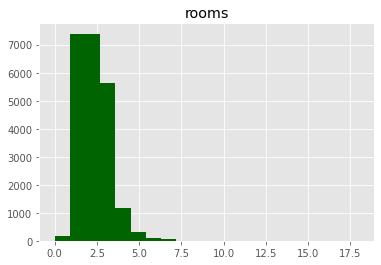

In [31]:
#remove outliers
df.drop(index=df.query('rooms > 7').index, inplace=True)

# to visualize the distribution of values after processing, we will build a histogram
df.hist('rooms', bins=20, range=(0,18), color='DarkGreen');

- The `ceiling_height` column contains data on the height of ceilings in real estate objects. As noted earlier in paragraph 2.6, the height of the ceilings is set taking into account the minimum requirements established by SNiP. Regardless of the year of construction and the type of building, the height from floor to ceiling should be within 2.5-3.2 meters. For example, where the ceiling heights are 25 m and 32 m, it is logical to assume that these are actually real values: 2.5 m and 3.2 m, respectively. There is also one value that shows the height of ceilings above 50m and several values where the height is less than 2m.


In [32]:
# make a selection using the query method with the necessary condition and print the result on the screen
print('Apartments with ceilings less than 2m: ' + str(df.query('ceiling_height <= 2')['ceiling_height'].count()))
print('Apartments with ceilings from 2 to 4m: ' + str(df.query('ceiling_height > 2 and ceiling_height <= 4')['ceiling_height'].count()))
print('Apartments with ceilings from 4 to 25m: ' + str(df.query('ceiling_height > 4 and ceiling_height < 25')['ceiling_height'].count()))
print('Apartments with ceilings from 25m to 32m: ' + str(df.query('ceiling_height >= 25 and ceiling_height <= 32')['ceiling_height'].count()))
print('Apartments with ceilings from 33m to 50m: ' + str(df.query('ceiling_height > 32 and ceiling_height < 50')['ceiling_height'].count()))
print('Apartments with ceilings over 50m: ' + str(df.query('ceiling_height >= 50')['ceiling_height'].count()))

Apartments with ceilings less than 2m: 10
Apartments with ceilings from 2 to 4m: 22099
Apartments with ceilings from 4 to 25m: 49
Apartments with ceilings from 25m to 32m: 17
Apartments with ceilings from 33m to 50m: 0
Apartments with ceilings over 50m: 1


First, remove the values where the height of the ceilings is from 4 to 25 meters. For apartments with ceiling heights up to 25 to 32 meters, we assume that there was a typo when entering data by dividing the corresponding values by 10. We delete the values ​​with ceiling heights of more than 32 meters and less than 2 meters.

In [33]:
#remove anomalies using logical filtering
df.drop(index=df.query('ceiling_height > 4 and ceiling_height < 25').index,inplace=True)

df.update(df[(df['ceiling_height'] >= 25) & (df['ceiling_height'] <= 32)]['ceiling_height']/10)

df.drop(index=df.query('ceiling_height > 32').index,inplace=True)
df.drop(index=df.query('ceiling_height <= 2').index,inplace=True)

- The `living_area` column has values with living area less than 10 sq.m. Remove these anomalies.

In [34]:
# make a selection using the query method with the necessary condition and print the result on the screen
print('Living area less than 10 sqm: ',df.query('living_area < 10')['living_area'].count())
print('Living area is greater than total area: ',df.query('living_area > total_area')['living_area'].count())

Living area less than 10 sqm:  26
Living area is greater than total area:  0


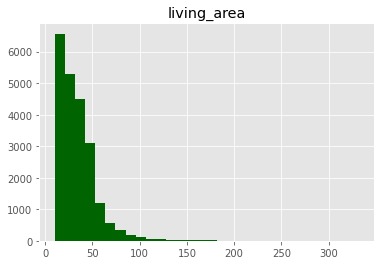

In [35]:
#remove outliers
df.drop(index=df.query('living_area < 10').index,inplace=True)

# to visualize the distribution of values after processing, we will build a histogram
df.hist('living_area', bins=30, color='DarkGreen');

- `kitchen_area` column - kitchen area. There are values ​​with a kitchen area of less than 2 square meters. Let's delete the data.

In [36]:
# make a selection using the query method with the necessary condition and print the result on the screen
print('Kitchen area less than 2 sq.m.: ', df.query('kitchen_area < 2')['living_area'].count())
print('Kitchen area is greater than the total area: ', df.query('kitchen_area > total_area')['living_area'].count())

Kitchen area less than 2 sq.m.:  0
Kitchen area is greater than the total area:  0


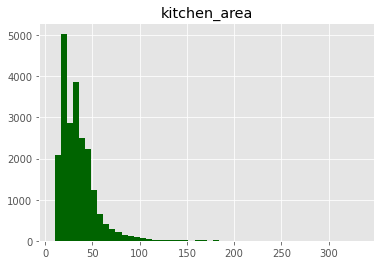

In [37]:
#remove abnormal values
df.drop(index=df.query('kitchen_area < 2').index,inplace=True)

# to visualize the distribution of values after processing, we will build a histogram
df.hist('kitchen_area', bins=50, color='DarkGreen');

Reset indexing after processing anomalies. Let's display the minimum and maximum values in the columns where we have processed anomalies in the data.

In [38]:
df.reset_index(drop=True, inplace=True)

(
    df[['rooms', 'total_area', 'ceiling_height', 'last_price', 'living_area',  'kitchen_area']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,last_price,living_area,kitchen_area
count,"22,090.00","22,090.00","22,090.00","22,090.00","22,090.00","22,090.00"
min,0.00,10.00,2.25,"2,000,000.00",10.00,10.00
max,7.00,332.00,4.00,"99,000,000.00",332.00,332.00


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22090 entries, 0 to 22089
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22090 non-null  int64         
 1   last_price            22090 non-null  int64         
 2   total_area            22090 non-null  float64       
 3   first_day_exposition  22090 non-null  datetime64[ns]
 4   rooms                 22090 non-null  int8          
 5   ceiling_height        22090 non-null  float64       
 6   floors_total          22090 non-null  int8          
 7   living_area           22090 non-null  float64       
 8   floor                 22090 non-null  int8          
 9   is_apartment          22090 non-null  bool          
 10  studio                22090 non-null  bool          
 11  open_plan             22090 non-null  bool          
 12  kitchen_area          22090 non-null  float64       
 13  balcony         

### Calculation and adding parameters to the table

#### Add a `price_per_m2` column showing the price per square meter

In [40]:
# calculate the price as the ratio of the price of the object to the total area of the object
df['price_per_m2'] = round(df['last_price'] / df['total_area'], 1)

# display the first 5 rows of the table
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2
0,20,13000000,51.00,2019-03-07,3,2.70,16,51.00,8,False,...,0,Санкт-Петербург,18863.00,16028,1.00,482.00,2.00,755.00,<NA>,254902.00
1,7,3350000,18.60,2018-12-04,1,2.65,11,18.60,1,False,...,2,Шушары,12817.00,18603,0.00,NaN,0.00,NaN,81,180107.50
2,10,5196000,34.30,2015-08-20,2,2.65,5,34.30,4,False,...,0,Санкт-Петербург,21741.00,13933,1.00,90.00,2.00,574.00,558,151486.90
3,0,64900000,90.81,2015-07-24,3,2.65,14,90.81,9,False,...,0,Санкт-Петербург,28098.00,6800,2.00,84.00,3.00,234.00,424,714679.00
4,2,10000000,32.00,2018-06-19,2,3.03,14,32.00,13,False,...,0,Санкт-Петербург,31856.00,8098,2.00,112.00,1.00,48.00,121,312500.00


#### Day of the week, month and year of publication of the announcement

In [41]:
# let's convert the days of the week to the designation by numbers, 0 for Monday and 6 for Sunday, respectively
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
df['day'] = df['first_day_exposition'].dt.weekday

# make it more convenient using a dictionary

dict_weekdays = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu',
                     4: 'Fri', 5: 'Sat', 6: 'Sun'}
#dict_month = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
                    # 5: 'May', 6: 'Jun', 7: 'Jul',
             # 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov',
                   #12: 'Dec'}
df['day'] = df['day'].map(dict_weekdays)
# df['month'] = df['month'].map(dict_month)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,month,year,day
0,20,13000000,51.00,2019-03-07,3,2.70,16,51.00,8,False,...,16028,1.00,482.00,2.00,755.00,<NA>,254902.00,3,2019,Thu
1,7,3350000,18.60,2018-12-04,1,2.65,11,18.60,1,False,...,18603,0.00,NaN,0.00,NaN,81,180107.50,12,2018,Tue
2,10,5196000,34.30,2015-08-20,2,2.65,5,34.30,4,False,...,13933,1.00,90.00,2.00,574.00,558,151486.90,8,2015,Thu
3,0,64900000,90.81,2015-07-24,3,2.65,14,90.81,9,False,...,6800,2.00,84.00,3.00,234.00,424,714679.00,7,2015,Fri
4,2,10000000,32.00,2018-06-19,2,3.03,14,32.00,13,False,...,8098,2.00,112.00,1.00,48.00,121,312500.00,6,2018,Tue


#### Floor type categorization.

In [42]:
# replace the floor value with a categorical one using .where()
df['floor_cat'] = np.where(df['floor'] == 1, 'first', 'other')
df['floor_cat'] = np.where(df['floor'] == df['floors_total'],
                                      'last', df['floor_cat']
                                     )

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,month,year,day,floor_cat
0,20,13000000,51.00,2019-03-07,3,2.70,16,51.00,8,False,...,1.00,482.00,2.00,755.00,<NA>,254902.00,3,2019,Thu,other
1,7,3350000,18.60,2018-12-04,1,2.65,11,18.60,1,False,...,0.00,NaN,0.00,NaN,81,180107.50,12,2018,Tue,first
2,10,5196000,34.30,2015-08-20,2,2.65,5,34.30,4,False,...,1.00,90.00,2.00,574.00,558,151486.90,8,2015,Thu,other
3,0,64900000,90.81,2015-07-24,3,2.65,14,90.81,9,False,...,2.00,84.00,3.00,234.00,424,714679.00,7,2015,Fri,other
4,2,10000000,32.00,2018-06-19,2,3.03,14,32.00,13,False,...,2.00,112.00,1.00,48.00,121,312500.00,6,2018,Tue,other


#### Distance to city center in kilometers

In [43]:
# convert values from m to km and round up to integer values
df['km_to_citycenters'] = round(df['citycenters_nearest'] / 1000)

# convert to integer format
df['km_to_citycenters'] = df['km_to_citycenters'].astype('int32')

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,month,year,day,floor_cat,km_to_citycenters
0,20,13000000,51.00,2019-03-07,3,2.70,16,51.00,8,False,...,482.00,2.00,755.00,<NA>,254902.00,3,2019,Thu,other,16
1,7,3350000,18.60,2018-12-04,1,2.65,11,18.60,1,False,...,NaN,0.00,NaN,81,180107.50,12,2018,Tue,first,19
2,10,5196000,34.30,2015-08-20,2,2.65,5,34.30,4,False,...,90.00,2.00,574.00,558,151486.90,8,2015,Thu,other,14
3,0,64900000,90.81,2015-07-24,3,2.65,14,90.81,9,False,...,84.00,3.00,234.00,424,714679.00,7,2015,Fri,other,7
4,2,10000000,32.00,2018-06-19,2,3.03,14,32.00,13,False,...,112.00,1.00,48.00,121,312500.00,6,2018,Tue,other,8


**Conclusion** : We got a dataset ready for analysis by including additional parameters in it, eliminating anomalies, repetitions and missing values in the data.

### Let's do an exploratory data analysis (EDA)

#### Let's study the following object parameters to build a histogram for each:

- `total_area` 

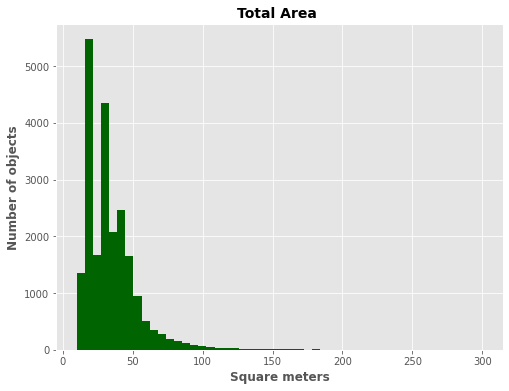

In [44]:
# let's build a histogram
plt.style.use('ggplot')

plt.figure(figsize=(8, 6))
plt.hist(df['total_area'], bins=50, range=(10,300), color='DarkGreen')
plt.title('Total Area ', fontsize=14, fontweight="bold")
plt.xlabel('Square meters', fontweight="bold")
plt.ylabel('Number of objects', fontweight="bold")
plt.show()

The histogram displays a very small number of objects with a total area of more than 200 sq.m. Most often there are objects with a total area of 30-80 sq.m. The histogram has a distribution with a break on the left. If you build a range diagram, there will be a few values ​​that turn out to be outliers, we can assume that this is a luxury property whose area is very different.

- `total_area` 

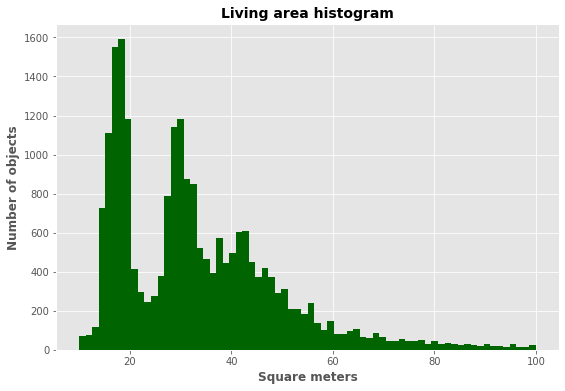

In [45]:
plt.style.use('ggplot')

plt.figure(figsize=(9, 6))
plt.hist(df['living_area'], bins=70, range=(10, 100), color='DarkGreen')
plt.title('Living area histogram', fontsize=14, fontweight="bold")
plt.xlabel('Square meters', fontweight="bold")
plt.ylabel('Number of objects', fontweight="bold")
plt.show()

We observe a two-peak (bimodal distribution) on our histogram. The largest number of objects from our data was collected at intervals corresponding to the living area of 10-20 sq.m. and at intervals of 28-36 sq.m. The two peaks in the graph could be caused by differences in the distribution of living space for 1-room, 2-room and multi-room residential properties, respectively.

- `kitchen_area` 

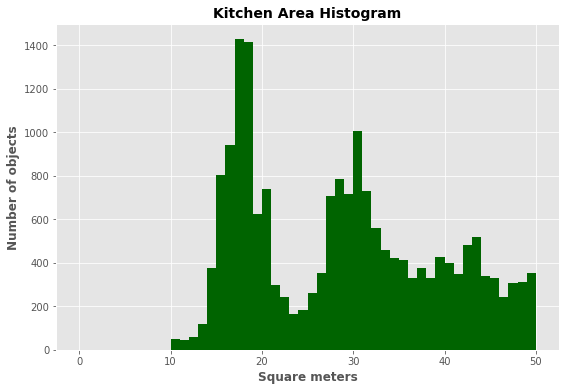

In [46]:
plt.style.use('ggplot')

plt.figure(figsize=(9, 6))
plt.hist(df['kitchen_area'], bins=50, range=(0, 50), color='DarkGreen')
plt.title('Kitchen Area Histogram', fontsize=14, fontweight="bold")
plt.xlabel('Square meters', fontweight="bold")
plt.ylabel('Number of objects', fontweight="bold")
plt.show()

On the histogram, we observe the distribution of values skewed to the right. The main number of objects is concentrated in the intervals corresponding to the kitchen area of 5-15 sq.m. Kitchens with an area of 32 sq.m. and more corresponds to a small number of objects in our dataset.

- `rooms` 

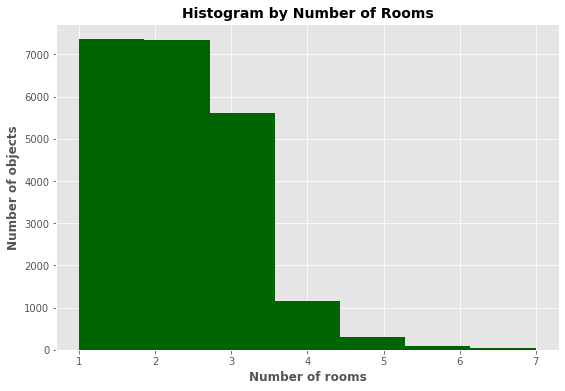

In [47]:
plt.style.use('ggplot')

plt.figure(figsize=(9, 6))
plt.hist(df['rooms'], bins=7, range=(1, 7), color='DarkGreen')
plt.title('Histogram by Number of Rooms', fontsize=14, fontweight="bold")
plt.xlabel('Number of rooms', fontweight="bold")
plt.ylabel('Number of objects', fontweight="bold")
plt.show()

On the histogram, we observe the distribution of values skewed to the right. Most dataset values are concentrated on 1-room, 2-room and 3-room properties, but there are rare exceptions, such as 6-room and 7-room properties.

- `ceiling_height` 

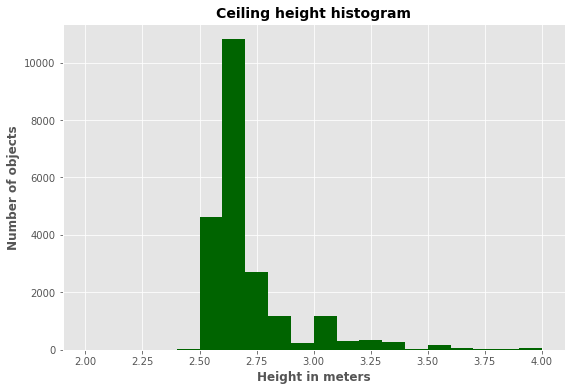

In [48]:
plt.style.use('ggplot')

plt.figure(figsize=(9, 6))
plt.hist(df['ceiling_height'], bins=20, range=(2, 4), color='DarkGreen')
plt.title('Ceiling height histogram', fontsize=14, fontweight="bold")
plt.xlabel('Height in meters', fontweight="bold")
plt.ylabel('Number of objects', fontweight="bold")
plt.show()

On the histogram, we observe two peaks of 2.5 m and 2.7 m, which corresponds to the logic of the minimum requirements established in SNiP for the height of residential premises. 

- `floor` 

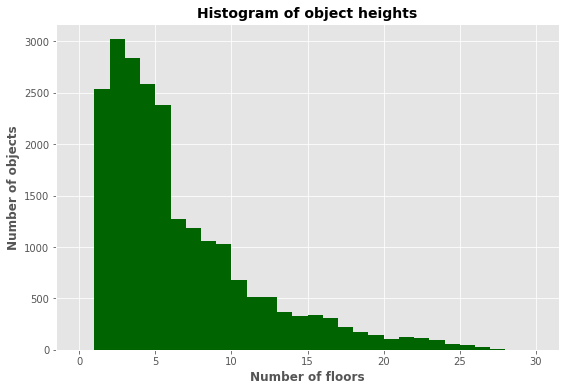

In [49]:
plt.style.use('ggplot')

plt.figure(figsize=(9, 6))
plt.hist(df['floor'], bins=30, range=(0, 30), color='DarkGreen')
plt.title('Histogram of object heights', fontsize=14, fontweight="bold")
plt.xlabel('Number of floors', fontweight="bold")
plt.ylabel('Number of objects', fontweight="bold")
plt.show()

The histogram shows a distribution of values skewed to the right. In our dataset, most of the objects are located on floors 1 to 6.

- `floor` 

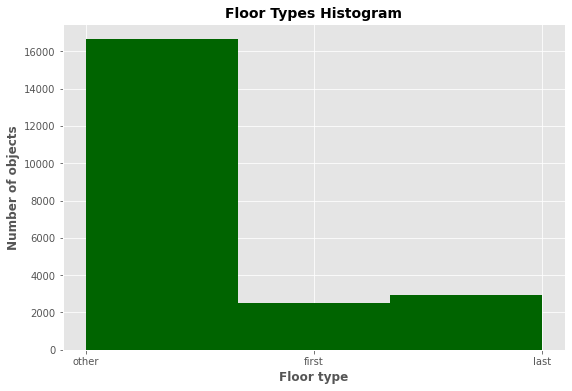

In [50]:
plt.style.use('ggplot')

plt.figure(figsize=(9, 6))
plt.hist(df['floor_cat'], bins=3, color='DarkGreen')
plt.title('Floor Types Histogram', fontsize=14, fontweight="bold")
plt.xlabel('Floor type', fontweight="bold")
plt.ylabel('Number of objects', fontweight="bold")
plt.show()

Based on the histogram, you can see that the main number of real estate objects is concentrated in the "Other" floor category. There are much fewer real estate objects located on the first and last floors.

- `floors_total` общее количество этажей в доме

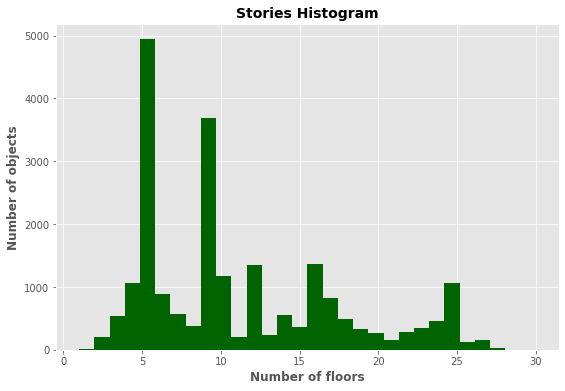

In [51]:
plt.style.use('ggplot')

plt.figure(figsize=(9, 6))
plt.hist(df['floors_total'], bins=30, range=(1, 30), color='DarkGreen')
plt.title('Stories Histogram', fontsize=14, fontweight="bold")
plt.xlabel('Number of floors', fontweight="bold")
plt.ylabel('Number of objects', fontweight="bold")
plt.show()

We observe a multimodal distribution of values with several peaks on the following properties: 5-story properties, 9-story properties, and the presence of small peaks in multi-story properties.

- `citycenters_nearest` 

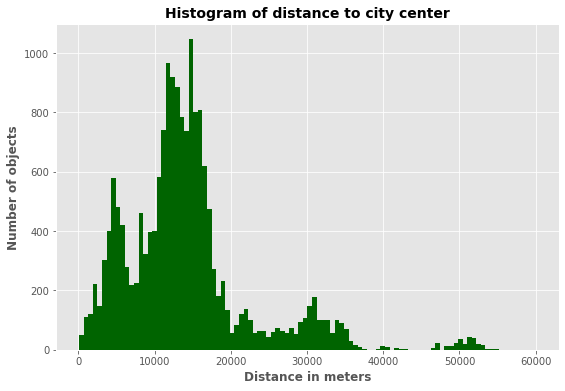

In [52]:
plt.style.use('ggplot')

plt.figure(figsize=(9, 6))
plt.hist(df['citycenters_nearest'], bins=100, range=(100, 60000), color='DarkGreen')
plt.title('Histogram of distance to city center', fontsize=14, fontweight="bold")
plt.xlabel('Distance in meters', fontweight="bold")
plt.ylabel('Number of objects', fontweight="bold")
plt.show()

Based on the histogram, we observe a two-peak (bimodal distribution of values). Most of the objects in our dataset are located at distances of 4-6 km and 12-17 km from the city center.

- `airport_nearest` 

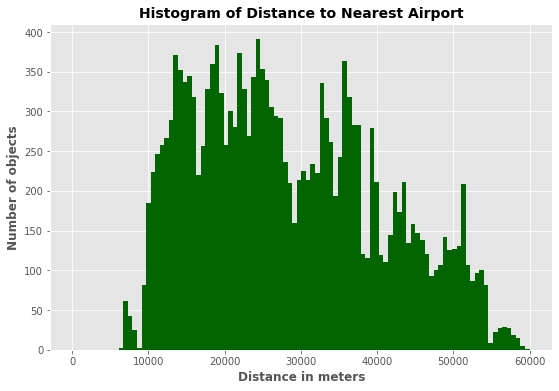

In [53]:
plt.style.use('ggplot')

plt.figure(figsize=(9, 6))
plt.hist(df['airports_nearest'], bins=100, range=(100, 60000), color='DarkGreen')
plt.title('Histogram of Distance to Nearest Airport', fontsize=14, fontweight="bold")
plt.xlabel('Distance in meters', fontweight="bold")
plt.ylabel('Number of objects', fontweight="bold")
plt.show()

The histogram looks like a "comb". Most dataset values are concentrated at a distance of 10 km from the airport and more. There are 2 isolated distributions with distances to the nearest airport less than 10 km and more than 55 km. There are few such data in the dataset, so they are not indicative.

- `park_nearest` 

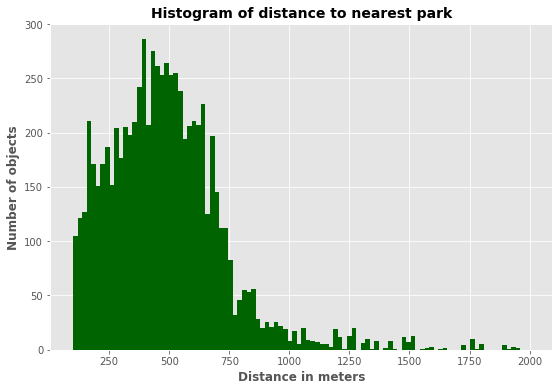

In [54]:
plt.style.use('ggplot')

plt.figure(figsize=(9, 6))
plt.hist(df['parks_nearest'], bins=100, range=(100, 2000), color='DarkGreen')
plt.title('Histogram of distance to nearest park', fontsize=14, fontweight="bold")
plt.xlabel('Distance in meters', fontweight="bold")
plt.ylabel('Number of objects', fontweight="bold")
plt.show()

The histogram shows a distribution of values skewed to the right. In our dataset, most of the objects are located at a distance of 250-750 m from the nearest park.

- `day`, `month` 

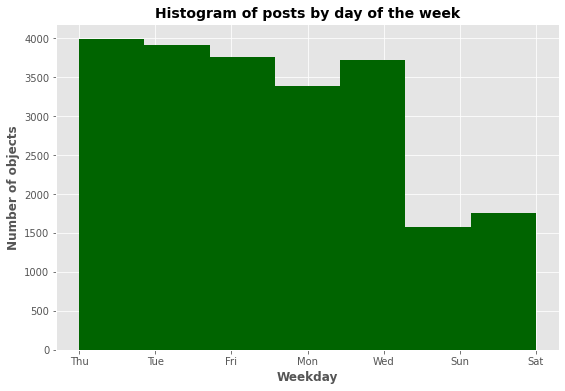

In [55]:
plt.style.use('ggplot')

plt.figure(figsize=(9, 6))
plt.hist(df['day'], bins=7, color='DarkGreen')
plt.title('Histogram of posts by day of the week', fontsize=14, fontweight="bold")
plt.xlabel('Weekday', fontweight="bold")
plt.ylabel('Number of objects', fontweight="bold")
plt.show()

From the histogram, we see that the number of publications on weekends is almost two times less than on weekdays. Apparently realtors are also resting!

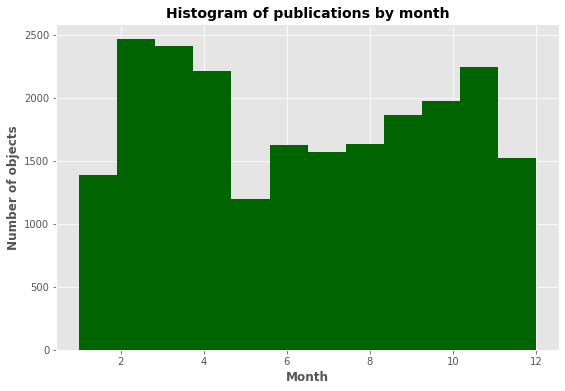

In [56]:
plt.style.use('ggplot')

plt.figure(figsize=(9, 6))
plt.hist(df['month'], bins=12, color='DarkGreen')
plt.title('Histogram of publications by month', fontsize=14, fontweight="bold")
plt.xlabel('Month', fontweight="bold")
plt.ylabel('Number of objects', fontweight="bold")
plt.show()

**Conclusion:** Thus, after preparing our initial data, we studied the parameters of real estate objects that are of interest to us. We built histograms for each of the parameters of our dataframe, having studied how the values of one or another parameter are distributed. General conclusions were drawn on the type of distributions based on data visualization using histograms using a different number of bins and intervals. Next, let's proceed to a more specific analysis, we will try to derive dependencies that affect the speed of sale of objects, the impact on the cost of objects and the average price.

#### Let's study how quickly apartments got sold (using the days_exposition column). This parameter shows how many days each ad has been posted.

In [57]:
df['days_exposition'].describe()

count   19192.00
mean      180.67
std       220.08
min         1.00
25%        44.00
50%        95.00
75%       231.00
max      1580.00
Name: days_exposition, dtype: float64

Let's build a histogram for 100 baskets and calculate the mean and median.

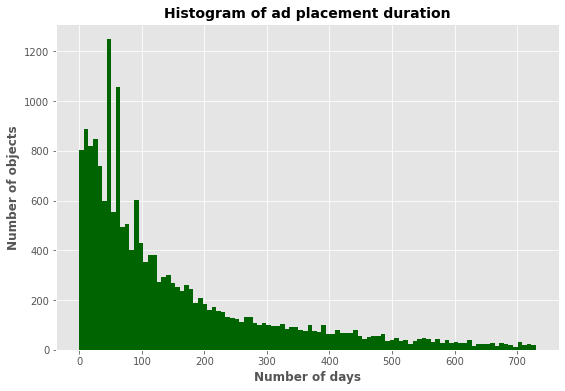

Average apartment sale time (days): 180
Median apartment sale time (days): 95


In [58]:
plt.style.use('ggplot')

plt.figure(figsize=(9, 6))
plt.hist(df['days_exposition'].where(lambda x: x > 0).dropna(), bins=100, range=(0, 730), color='DarkGreen')
plt.title('Histogram of ad placement duration', fontsize=14, fontweight="bold")
plt.xlabel('Number of days', fontweight="bold")
plt.ylabel('Number of objects', fontweight="bold")
plt.show()

print(f'Average apartment sale time (days):',int(df['days_exposition'].mean()))
print(f'Median apartment sale time (days):',int(df['days_exposition'].median()))


***Conclusion:*** From the data visualization, one can observe a right skewed distribution. The mean and median differ by almost 2 times. This is precisely due to the type of distribution, where there is a long "tail" of values, that is, apartments that were sold longer than usual. We can also observe several peaks in the histogram, which visualize outliers in the data. Outliers can be associated, for example, with paid ads that have expired, or the result of a system for removing inactive ads.
Based on the analysis, a quick sale can be called a period of 45 days or less (25th percentile). Long sell - 230 days or longer (75th percentile).

### Evaluation of the factors that most affect the total (full) cost of the object.

#### To get a dataset with values without outliers, let's make a slice from our processed `df` table. This will allow us to get a more accurate picture in our analysis:

In [59]:
cols = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 'ceiling_height', 'rooms'] # one or more

Q1 = df[cols].quantile(0.10)
Q3 = df[cols].quantile(0.85)
IQR = Q3 - Q1

good_df = df[~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]    

good_df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,month,year,km_to_citycenters
count,20317.00,20317.00,20317.00,20317.00,20317.00,20317.00,20317.00,20317.00,20317.00,20317.00,...,20317.00,16260.00,6835.00,16260.00,7818.00,17800.00,20317.00,20317.00,20317.00,20317.00
mean,9.91,5415972.71,31.70,1.98,2.67,11.28,31.70,6.15,31.70,0.62,...,11888.46,0.56,494.48,0.71,531.19,157.05,181981.22,6.41,2017.41,11.89
std,5.62,2783958.45,14.20,0.93,0.14,6.64,14.20,4.99,14.20,0.98,...,9566.80,0.76,339.38,0.90,276.03,172.16,73825.04,3.49,0.99,9.57
min,0.00,2000000.00,10.00,0.00,2.25,1.00,10.00,1.00,10.00,0.00,...,0.00,0.00,1.00,0.00,13.00,1.00,24255.80,1.00,2014.00,0.00
25%,6.00,3550000.00,18.80,1.00,2.60,5.00,18.80,3.00,18.80,0.00,...,4615.00,0.00,292.00,0.00,315.00,43.00,132768.40,3.00,2017.00,5.00
50%,10.00,4600000.00,30.00,2.00,2.65,9.00,30.00,5.00,30.00,0.00,...,12100.00,0.00,458.00,0.00,519.50,90.00,169968.10,6.00,2017.00,12.00
75%,14.00,6400000.00,40.60,3.00,2.70,16.00,40.60,8.00,40.60,1.00,...,15726.00,1.00,616.50,1.00,741.00,210.00,217647.10,10.00,2018.00,16.00
max,50.00,18120000.00,98.00,6.00,3.24,60.00,98.00,33.00,98.00,5.00,...,65952.00,3.00,3190.00,3.00,1344.00,881.00,1066000.00,12.00,2019.00,66.00


In [60]:
print('The sample for analysis is: {:.2%}'.format(len(good_df)/len(df)))

The sample for analysis is: 91.97%


#### Let's try to determine the presence of a linear relationship between the values using correlation and subsequent visualization.

In [61]:
# for correlation calculations, we translate the floor type into numerical variables
def floor_status(row):
    if row['floor_cat'] == 'first':
        return 0
    elif row['floor_cat'] == 'last':
        return 1
    else:
        return 2
    
good_df['floor_cat_n'] = df.apply(floor_status, 1)
df['floor_cat_n'] = df.apply(floor_status, 1)

In [62]:
# let's build a table correlation table with a cut of outliers not exceeding 10% of the amount of initial data

good_df_corr = good_df[['total_area', 'living_area',
                        'kitchen_area', 'rooms',
                        'day', 'month',
                        'year', 'last_price', 'floor_cat_n']]
good_df_corr.corr()

,total_area,living_area,kitchen_area,rooms,month,year,last_price,floor_cat_n
total_area,1.00,1.00,1.00,0.88,0.00,-0.05,0.64,-0.06
living_area,1.00,1.00,1.00,0.88,0.00,-0.05,0.64,-0.06
kitchen_area,1.00,1.00,1.00,0.88,0.00,-0.05,0.64,-0.06
rooms,0.88,0.88,0.88,1.00,-0.00,-0.04,0.48,-0.09
month,0.00,0.00,0.00,-0.00,1.00,-0.28,0.00,0.02
year,-0.05,-0.05,-0.05,-0.04,-0.28,1.00,0.01,0.02
last_price,0.64,0.64,0.64,0.48,0.00,0.01,1.00,0.10
floor_cat_n,-0.06,-0.06,-0.06,-0.09,0.02,0.02,0.10,1.00


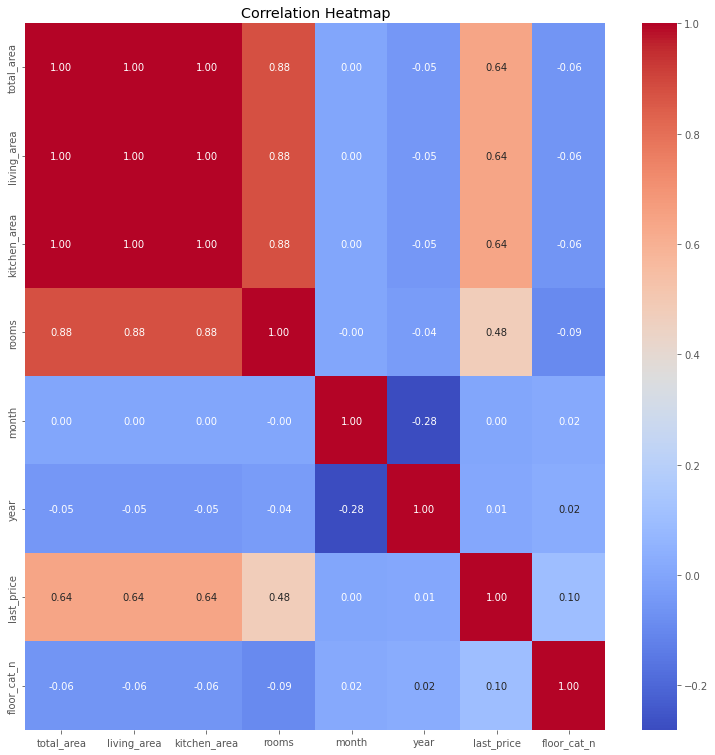

In [63]:
# build a heat map, round the correlation coefficients to 2 digits
plt.figure(figsize=(13,13))
sns.heatmap(good_df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Conclusion:** Having studied the relationship of several values using the hitmap, we see that the positive Pearson correlation coefficient indicates a strong influence of the total area of the object to the price of the object. It turns out that the larger the area of the property, the greater the price of the object. A lower Pearson coefficient is observed for the parameters: the number of rooms and the category of floors. Accordingly, the dependence of the object price on these parameters is weaker. For other parameters, the correlation coefficient is almost zero. It can be argued that the linear relationship is weak or absent altogether. It happens that the coefficient is zero, not because there is no connection between the values, but because it has a more complex, non-linear character. Therefore, the correlation coefficient does not show such a relationship.

#### Let's study the price behavior of objects using our slice `good_df`. Let's build graphs that will show the dependence of the price on the parameters we have chosen. To prepare the data before visualization, we will use pivot tables.

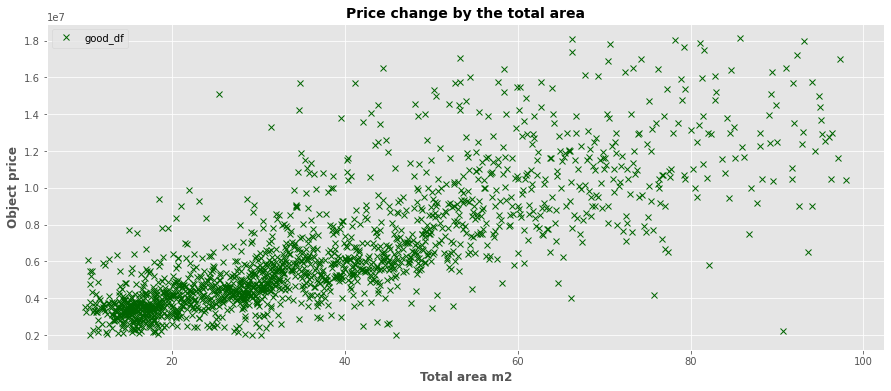

In [76]:
# group the data by the price column at the time of removal from publication and build a chart
# using the desired options
good_df.groupby('total_area')['last_price'].agg('median').plot(
    x='total_area', style='x', figsize=(15, 6), legend = True, color='DarkGreen')

plt.legend(['good_df'])
plt.title('Price change by the total area', fontsize=14, fontweight="bold")
plt.xlabel('Total area m2', fontweight="bold")
plt.ylabel('Object price', fontweight="bold")
plt.show()

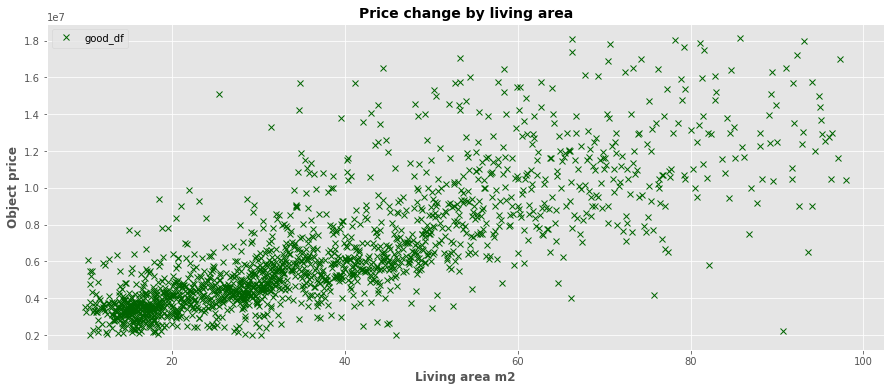

In [77]:
good_df.groupby('living_area')['last_price'].agg('median').plot(
    x='living_area', style='x', figsize=(15, 6), legend = True, color='DarkGreen')

plt.legend(['good_df'])
plt.title('Price change by living area', fontsize=14, fontweight="bold")
plt.xlabel('Living area m2', fontweight="bold")
plt.ylabel('Object price', fontweight="bold")
plt.show()

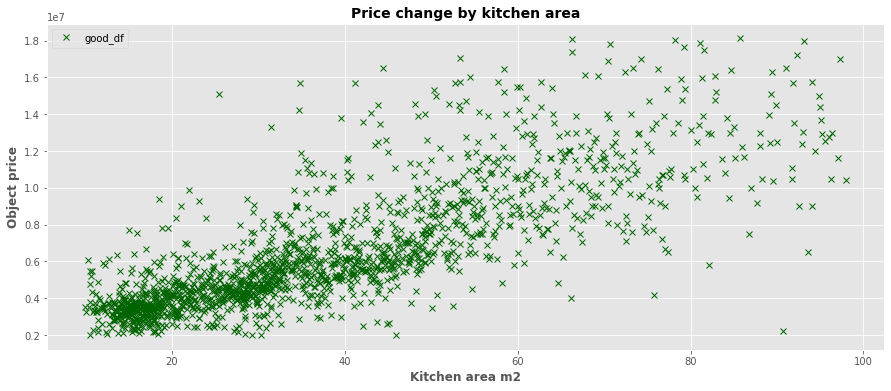

In [78]:
good_df.groupby('kitchen_area')['last_price'].agg('median').plot(
    x='kitchen_area', style='x', figsize=(15, 6), legend = True, color='DarkGreen')

plt.legend(['good_df'])
plt.title('Price change by kitchen area', fontsize=14, fontweight="bold")
plt.xlabel('Kitchen area m2', fontweight="bold")
plt.ylabel('Object price', fontweight="bold")
plt.show()

**Conclusion:** As it was done above in paragraph 5.2 with the help of correlation, the charts we built also confirm the dependence of the price on the parameters indicated in them. Thus, the graphs indicate a strong relationship between the total area of the object and the price, in accordance with the area of ​​a higher density of points, which increases linearly. It can be argued that the larger the total area of the property, the greater the price of the property.

#### Plotting charts by publication dates (weekday, month, year).

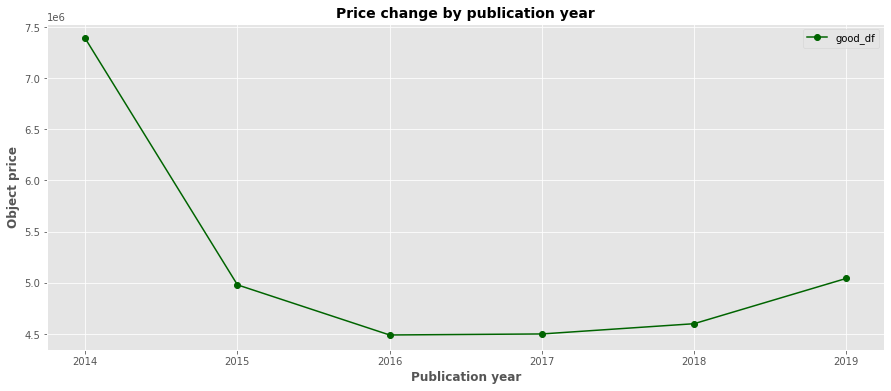

In [67]:
good_df.groupby('year')['last_price'].agg('median').plot(
    x='year', style='o-', figsize=(15, 6), legend = True, color='DarkGreen')

plt.legend(['good_df'])
plt.title('Price change by publication year', fontsize=14, fontweight="bold")
plt.xlabel('Publication year', fontweight="bold")
plt.ylabel('Object price', fontweight="bold")
plt.show()

**Conclusion:** Based on the graph, the peak value falls on 2014. It can be suggested that this is due to the increased interest in investing money in the purchase of real estate, which caused an increase in prices on the market. After a fairly strong decline by 2015, we observe the homogeneity of prices for 2016-2017. The next growth trend began to appear from 2017 to 2019.

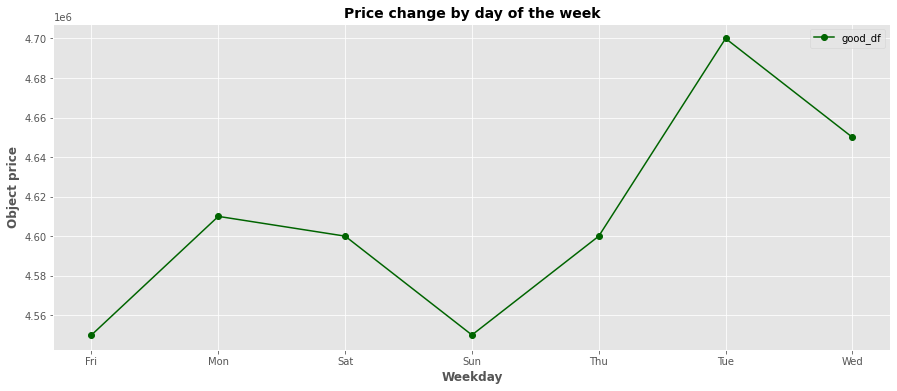

In [79]:
good_df.groupby('day')['last_price'].agg('median').plot(
    x='day', style='o-', figsize=(15, 6), legend = True, color='DarkGreen')

plt.legend(['good_df'])
plt.title('Price change by day of the week', fontsize=14, fontweight="bold")
plt.xlabel('Weekday', fontweight="bold")
plt.ylabel('Object price', fontweight="bold")
plt.show()

A specific dependence of the price of the object on the day of publication was not revealed. It can be noted that the prices of publications at the beginning of the week are slightly higher than on weekends.

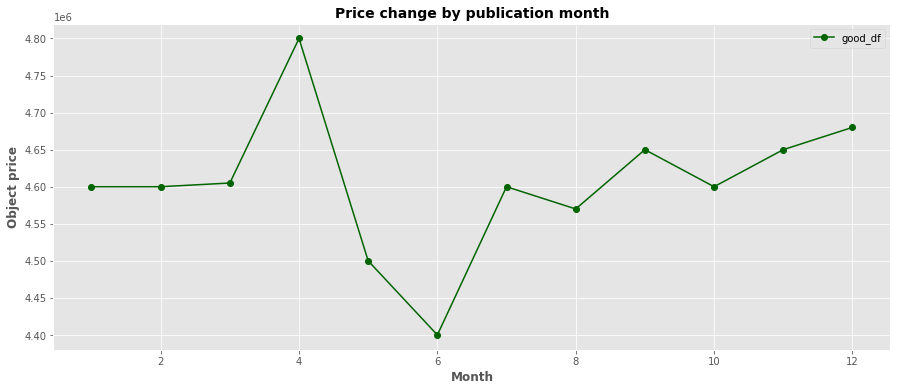

In [69]:
good_df.groupby('month')['last_price'].agg('median').plot(
    x='month', style='o-', figsize=(15, 6), legend = True, color='DarkGreen')

plt.legend(['good_df'])
plt.title('Price change by publication month', fontsize=14, fontweight="bold")
plt.xlabel('Month', fontweight="bold")
plt.ylabel('Object price', fontweight="bold")
plt.show()

Graphical visualization of the dependence of the price of publications by months also does not show a strong dependence. You can observe a slight trend of increasing the prices of publications in the summer.

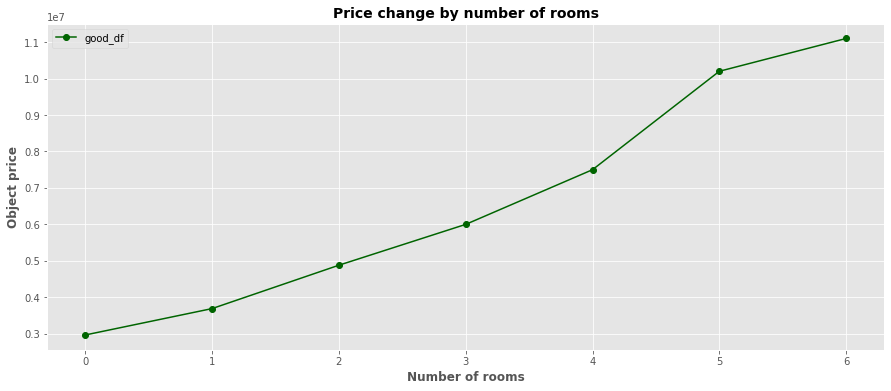

In [70]:
good_df.groupby('rooms')['last_price'].agg('median').plot(
    x='rooms', style='o-', figsize=(15, 6), legend = True, color='DarkGreen')

plt.legend(['good_df'])
plt.title('Price change by number of rooms', fontsize=14, fontweight="bold")
plt.xlabel('Number of rooms', fontweight="bold")
plt.ylabel('Object price', fontweight="bold")
plt.show()

From this graph, you can see how the price of publications increases with the increase in the number of rooms. Since with an increase in the number of living rooms, the area of ​​the object also increases, respectively, this causes an increase in the cost of the object and we can observe this dependence.

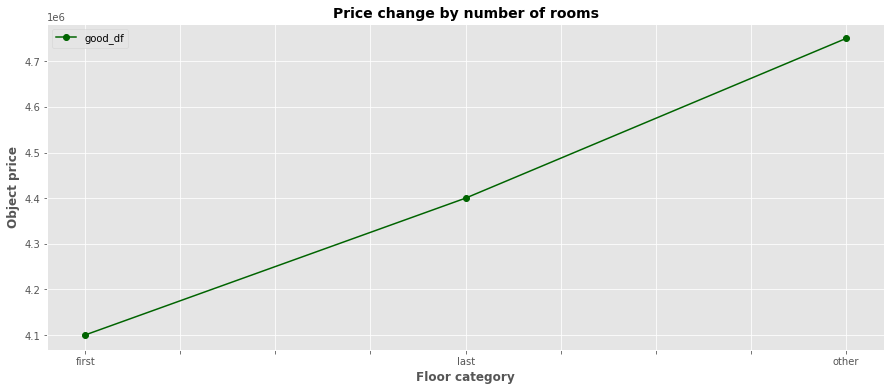

In [71]:
good_df.groupby('floor_cat')['last_price'].agg('median').plot(
    x='floor_cat', style='o-', figsize=(15, 6), legend = True, color='DarkGreen')

plt.legend(['good_df'])
plt.title('Price change by number of rooms', fontsize=14, fontweight="bold")
plt.xlabel('Floor category', fontweight="bold")
plt.ylabel('Object price', fontweight="bold")
plt.show()

It is impossible to see a clear dependence of the floor category on the price of the property. At the same time, the graph shows that real estate objects located on the first floor are inferior in price to other objects. Objects located on the top floor have a slightly higher value than those on the first floor. Apartments located between the first and last floors have a higher price in our sample.

#### Let's calculate the average price of one square meter in 10 settlements with the largest number of ads. Let's highlight the settlements with the highest and lowest cost per square meter. We will find this data by name in the `locality_name` column.

In [72]:
# build a pivot table based on the values from the original df dataset
top_10 = df.pivot_table(index='locality_name',
                                      values='price_per_m2',
                                      aggfunc=['count', 'mean']
                                     )
# define columns with the number of ads and the average price per sq.m. for each locality
# sort the results in descending order and display the first 10 values on the screen
top_10.columns = ['ads_count', 'mean_price_per_m2']
top = top_10.sort_values(by='ads_count', ascending=False).head(10)

top

,ads_count,mean_price_per_m2
locality_name,,
Санкт-Петербург,15496,210450.93
Мурино,570,173722.35
Кудрово,468,192644.12
Шушары,435,153828.28
Всеволожск,376,134106.03
Пушкин,367,190969.01
Колпино,337,131868.68
Парголово,324,197676.14
Гатчина,287,124436.97


**Conclusion:** Of the presented cities, St. Petersburg is the leader in terms of the number of publications of real estate objects with a price per sq.m. about 210,000 rubles Closes our Top-10 rating is Peterhof, while the price per sq. m. of real estate is lower and amounts to 148,000 rubles.

#### Select apartments in St. Petersburg using the locality_name column and calculate the average price per kilometer. Let us describe how the cost of objects depends on the distance to the city center.

In [73]:
# create a condition for the selection of all real estate objects in St. Petersburg with a distance of 1 km or more from the center
# build a pivot table based on the average price
spb_center = df.query('km_to_citycenters > 0').pivot_table(index='km_to_citycenters',
                                              values=['last_price'],
                                              aggfunc='mean'
                                             ).reset_index()
spb_center.head(12)

,km_to_citycenters,last_price
0,1,16191956.75
1,2,14815946.40
2,3,10919820.79
3,4,11393034.34
4,5,12583258.96
5,6,13221832.14
6,7,13747253.83
7,8,9106251.54
8,9,6959274.53
9,10,6416296.12


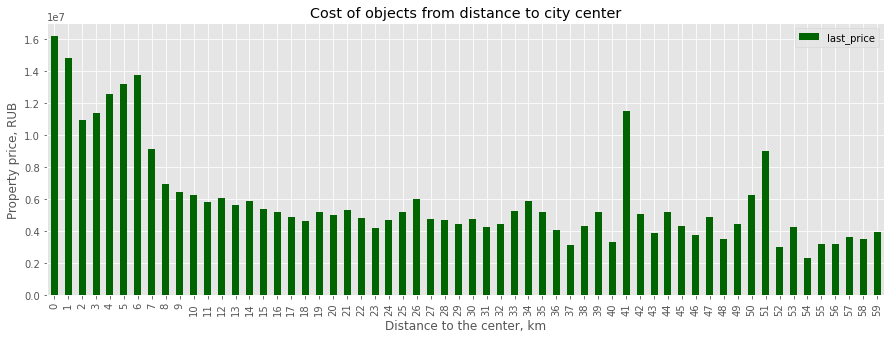

In [74]:
# Let's graphically represent the distribution of the dependence of the price of the object on the distance to the center of St. Petersburg
spb_center.plot(y='last_price', kind='bar', figsize=(15,5),
                                              sharex=True, color='DarkGreen'
                                                   )
plt.ylabel('Property price, RUB')
plt.xlabel('Distance to the center, km')
plt.title('Cost of objects from distance to city center')
plt.show()

In [75]:
# see the correlation coefficient
print('Corelation of price and distance from the center:','\n')
print(spb_center.corr(),'\n')

Corelation of price and distance from the center: 

                   km_to_citycenters  last_price
km_to_citycenters               1.00       -0.63
last_price                     -0.63        1.00 



**Conclusion:** At a distance of 1-2 km from the center of St. Petersburg, the highest price for real estate is observed. From 7-8 km, a decline begins and some constancy is observed. We can observe price increases at 43 km and 55 km. This can be determined either by the large size of the living space (country townhouses), or by the category of luxury real estate. When viewing the correlation, we observe a negative Pearson correlation coefficient, since a decrease in one value is associated with an increase in another. That is, with increasing distance to the center of St. Petersburg, the price of the property decreases. Which is also a confirmation of our addiction.

### General conclusion

After performing a complete pre-processing of the data and having studied it, we found interesting features and dependencies that exist in the real estate market. We confirmed the dependences on the graphs using correlation and Pearson's coefficient. Based on our analysis, we can draw the following final conclusions:

- The strongest influence on the price is exerted by the total area of the property and the maximum proximity to the city center (on the example of St. Petersburg). The closer to the center, the higher the price of the object. The number of rooms also affects the price of the property, which is logical to associate with the total area of the apartment. The peak of property prices came in 2014. It can be suggested that this was due to the increased interest in investing money in the purchase of real estate, which caused an increase in prices in the market.

- Based on the timing of the sale of objects, most often the apartment was sold in 95 days. We came to the conclusion that if a publication was listed for less than 45 days, then it is considered a quick sale, and if it is longer than 230 days, it is a long sale. There were a large number of apartments sold in just a few days after publication.

- The first floor turned out to be much cheaper than the other categories of floors. Also, the cost of an apartment on the top floor is lower than on the rest, except for the first one.

- We found out the cost per square meter in the top 10 settlements by the number of ads. The leader is the city of St. Petersburg with a price of 114,848 rubles per sq.m.